In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [9]:
dataset=pd.read_csv(r'/content/driver/My Drive/info1.csv')
dataset





,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
237,11/21/2019,715.50,721.45,710.50,713.25,713.25,9692973
238,11/22/2019,711.75,712.00,685.10,693.20,693.20,14415826
239,11/25/2019,693.35,705.15,693.20,698.10,698.10,7334511
240,11/26/2019,705.00,707.25,686.00,690.60,690.60,27252999


([<matplotlib.axis.XTick at 0x7f9f4f6046a0>,
 <a list of 13 Text xticklabel objects>)

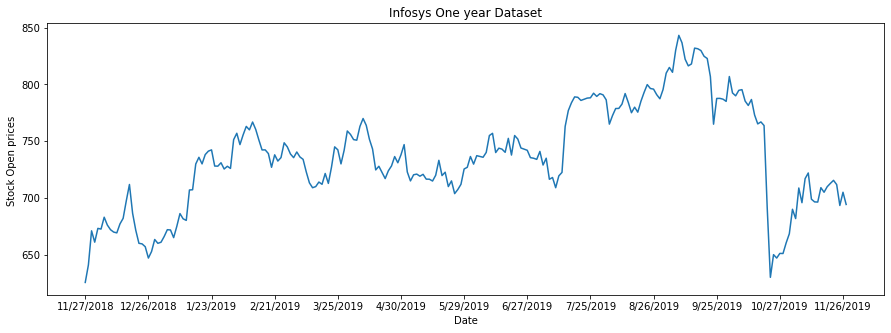

In [10]:
plt.figure(figsize=(15,5))
plt.title('Infosys One year Dataset')
plt.xlabel('Date')
plt.ylabel('Stock Open prices ')
plt.plot(dataset['Open'])
plt.xticks(np.arange(0,241,20),dataset['Date'][0:241:20])


In [13]:
x=np.mean(dataset['Open'])
x

736.1247933884292

In [14]:
y=np.std(dataset['Open'])
y

45.095987674028756

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [16]:
dataset.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Text(0.5, 1.0, 'Infosys stock data')

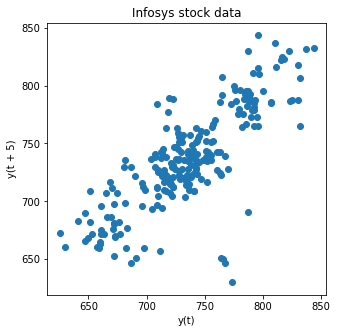

In [17]:
plt.figure(figsize=(5,5))#to set the size of figure
lag_plot(dataset['Open'],lag=5)
plt.title("Infosys stock data")

In [18]:
a=int(len(dataset)*0.8)
a

193

In [19]:
train_set,test_set=dataset[0:a],dataset[a:]
train_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
188,9/6/2019,843.30,847.00,835.05,840.15,821.06,6106841
189,9/9/2019,836.80,840.30,827.55,829.10,810.26,4377870
190,9/11/2019,822.30,828.55,814.15,820.10,801.47,7981036
191,9/12/2019,816.40,819.85,810.85,816.40,797.85,4400017


([<matplotlib.axis.XTick at 0x7f9f40b01198>,
 <a list of 10 Text xticklabel objects>)

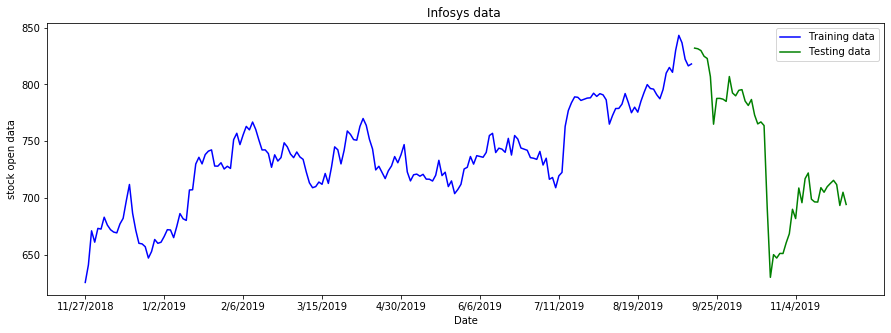

In [20]:
plt.figure(figsize=(15,5))
plt.title("Infosys data ")
plt.xlabel("Date")
plt.ylabel("stock open data")
plt.plot(train_set['Open'],color='blue',label='Training data')
plt.plot(test_set['Open'],color='green',label='Testing data')
plt.legend()
plt.xticks(np.arange(0,241,25),dataset['Date'][0:241:25])


In [0]:
def smape(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred)*200/(np.abs(y_true)+np.abs(y_pred))))


In [22]:
train_val=train_set['Open'].values
test_val=test_set['Open'].values
history=[x for x in train_val]
print(type(history))#this is list of training data
prediction=list()
prediction
for t in range(len(test_val)):
    model=ARIMA(history,order=(3,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    prediction.append(yhat)
    obs=test_val[t]
    history.append(obs)
error=mean_squared_error(test_val,prediction)
print("Mean squared error : %0.3f",error)
error2=smape(test_val,prediction)
print("Symmetric mean absolute percentage error: %0.3f",error2)



<class 'list'>
Mean squared error : %0.3f 367.67769088965764
Symmetric mean absolute percentage error: %0.3f 8.995985585381142


In [23]:
print('Testing Mean Squared Error: %.3f' % error)
print("Symmetric mean absolute percentage error: %0.3f" %error2)



Testing Mean Squared Error: 367.678
Symmetric mean absolute percentage error: 8.996


In [24]:
df1=pd.DataFrame({'Actual':test_val,'Predicted':prediction})
df1


,Actual,Predicted
0,832.05,[819.3105842226577]
1,831.50,[833.8618069712458]
2,829.90,[832.5257068239032]
3,824.85,[830.5032998207962]
4,822.90,[825.6499515800966]
5,806.90,[823.8351064501422]
6,765.00,[807.1807712642617]
7,787.70,[761.8995589598533]
8,787.75,[789.7808304010986]
9,787.05,[789.0719507756486]


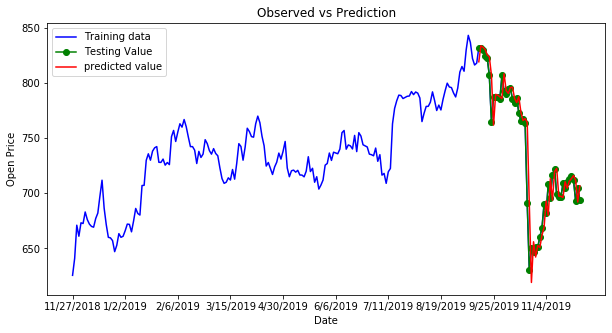

In [25]:
plt.figure(figsize=(10,5))
plt.title("Observed vs Prediction")
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.plot(dataset['Open'],color='blue',label='Training data')
plt.plot(test_set.index,test_set['Open'],'green',marker='o',label='Testing Value')#since training and testing was overlapping therfore marker was used
plt.plot(test_set.index,prediction,'red',label='predicted value')
plt.xticks(np.arange(0,241,25), dataset['Date'][0:241:25])
plt.legend()


In [26]:
n=int(len(df1))
242-193

49

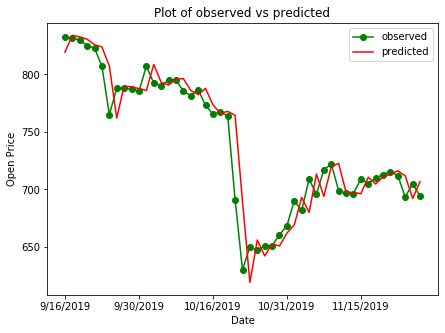

In [27]:
plt.figure(figsize=(7,5))
plt.title("Plot of observed vs predicted")
plt.xlabel("Date")
plt.ylabel('Open Price')
plt.plot(test_set.index,test_val,"green",label="observed",marker='o')
plt.plot(test_set.index,prediction,"red",label="predicted")
plt.xticks(np.arange(193,242,10),dataset['Date'][193:242:10])
plt.legend()


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  240
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -936.114
Method:                       css-mle   S.D. of innovations             11.959
Date:                Mon, 09 Mar 2020   AIC                           1882.227
Time:                        16:54:02   BIC                           1899.630
Sample:                             1   HQIC                          1889.239
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3385      0.832      0.407      0.685      -1.293       1.970
ar.L1.D.y      0.0844      0.065      1.303      0.194      -0.042       0.211
ar.L2.D.y     -0.0243      0.066     -0.368      0.713      -0.154       0.105
ar.L3.D.y      0.0125      0.066      0.190      0.850      -0.116       0.141
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2566           -4.0486j            4.2391           -0.2979
AR.2           -1.2566           +4.0486j            4.2391            0.2979
AR.3            4.4602           -0.0000j            4.4602           -0.0000
-----------------------------------------------------------------------------
"""

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [30]:
date_val=dataset.index
#df.index=df['Date']
dataset.sort_index(ascending=True,axis=0)
data=pd.DataFrame({"Date":date_val,'Open':dataset['Open']})

dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
237,11/21/2019,715.50,721.45,710.50,713.25,713.25,9692973
238,11/22/2019,711.75,712.00,685.10,693.20,693.20,14415826
239,11/25/2019,693.35,705.15,693.20,698.10,698.10,7334511
240,11/26/2019,705.00,707.25,686.00,690.60,690.60,27252999


In [31]:
df2 = dataset.reset_index()
prices = df2['Open'].tolist()
dates = df2.index.tolist()
 
prices1=df2['Open'].values.reshape(-1,1) 
dates1=df2.index.values.reshape(-1,1)
prices1

array([[625.5 ],
       [640.95],
       [671.  ],
       [661.  ],
       [673.15],
       [672.55],
       [683.  ],
       [676.1 ],
       [672.  ],
       [669.9 ],
       [669.2 ],
       [677.1 ],
       [682.  ],
       [697.45],
       [711.85],
       [686.5 ],
       [671.55],
       [660.  ],
       [659.5 ],
       [657.  ],
       [647.  ],
       [652.75],
       [663.35],
       [660.  ],
       [660.95],
       [666.  ],
       [672.  ],
       [671.75],
       [665.  ],
       [674.95],
       [686.2 ],
       [681.6 ],
       [680.2 ],
       [707.  ],
       [707.2 ],
       [729.9 ],
       [735.8 ],
       [730.  ],
       [738.2 ],
       [741.25],
       [742.35],
       [728.1 ],
       [728.  ],
       [731.  ],
       [725.5 ],
       [727.9 ],
       [726.  ],
       [751.35],
       [757.  ],
       [747.  ],
       [755.55],
       [763.05],
       [760.  ],
       [766.9 ],
       [760.35],
       [751.  ],
       [742.3 ],
       [742.35],
       [739.1 

In [32]:
regressor = LinearRegression()
regressor.fit(dates1, prices1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

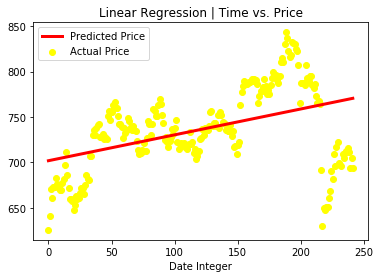

In [33]:
plt.scatter(dates1, prices1, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates1, regressor.predict(dates1), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
 

In [34]:
date = 10
#predicted_price =regressor.predict(date)
#print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])
#xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2, random_state=42)
xtrain=dates1[0:a]
ytrain=prices1[0:a]
xtest=dates1[a:]
ytest=prices1[a:]
regressor.fit(xtrain, ytrain)
 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

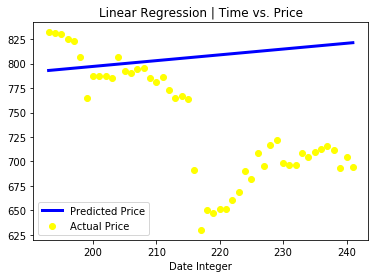

In [35]:
plt.scatter(xtest, ytest, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()



In [36]:
erro=metrics.mean_squared_error(ytest,regressor.predict(xtest))
erro



8857.642449335279

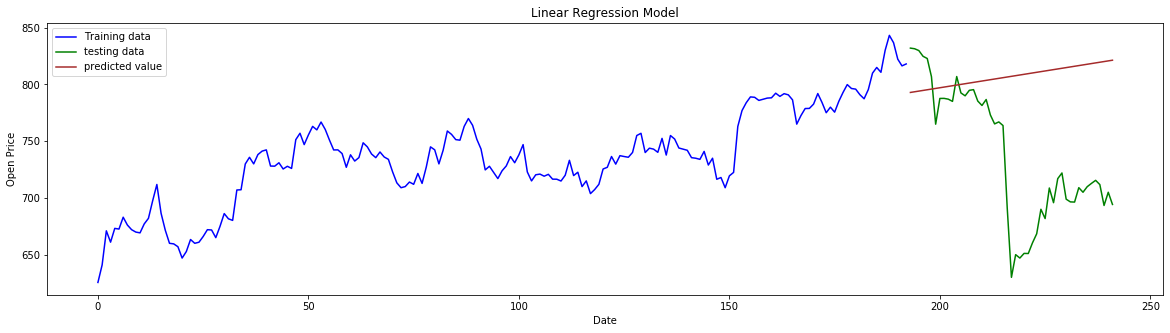

In [37]:
plt.figure(figsize=(20,5))
plt.title("Linear Regression Model")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.plot(ytrain,"blue",label="Training data")
plt.plot(test_set.index,ytest,"green",label="testing data")
#plt.plot(test_set.index,y_pred,"red")
plt.plot(test_set.index,regressor.predict(xtest),"brown",label="predicted value")
#plt.xticks(dataset['Date'][0:242:20])
plt.legend()



In [38]:
a=int(len(dataset)*0.8)
train=data[0:a]
test=data[a:]
test


,Date,Open
193,193,832.05
194,194,831.50
195,195,829.90
196,196,824.85
197,197,822.90
198,198,806.90
199,199,765.00
200,200,787.70
201,201,787.75
202,202,787.05


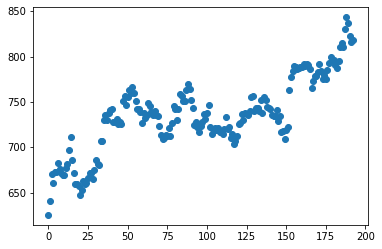

In [39]:
x_train=train['Date'].values.reshape(-1,1)
y_train=train['Open'].values.reshape(-1,1)
x_test=test['Date'].values.reshape(-1,1)
y_test=test['Open'].values.reshape(-1,1)
plt.scatter(x_train,y_train)

In [0]:

model=LinearRegression()
dates=data['Date'].values.reshape(-1,1)
Open=data['Open'].values.reshape(-1,1)
model.fit(dates,Open)
#model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [41]:
df1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
#df1=pd.DataFrame({'Actual':test_val,'Predicted':prediction})
df1


,Actual,Predicted
0,832.05,756.806026
1,831.50,757.091285
2,829.90,757.376543
3,824.85,757.661801
4,822.90,757.947060
5,806.90,758.232318
6,765.00,758.517577
7,787.70,758.802835
8,787.75,759.088093
9,787.05,759.373352


0      11/27/2018
1      11/28/2018
2      11/29/2018
3      11/30/2018
4       12/3/2018
          ...    
237    11/21/2019
238    11/22/2019
239    11/25/2019
240    11/26/2019
241    11/27/2019
Name: Date, Length: 242, dtype: object

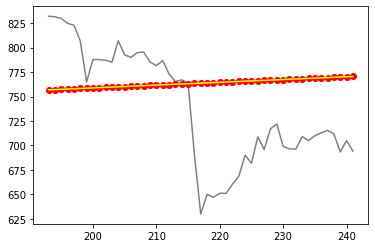

In [42]:
plt.plot(x_test,y_test,color='grey')
plt.plot(x_test,y_pred,color='red',marker='o')
plt.plot(x_test,model.predict(x_test),color='yellow')



dataset['Date']

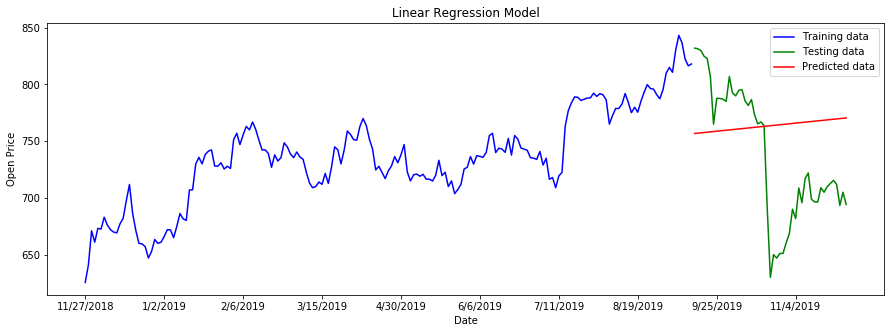

In [43]:
plt.figure(figsize=(15,5))
plt.title("Linear Regression Model")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.plot(train.index,y_train,"blue",label='Training data')
plt.plot(test.index,y_test,"green",label='Testing data')
plt.plot(test.index,y_pred,"red",label='Predicted data')
plt.xticks(np.arange(0,242,25),dataset['Date'][0:242:25])
#plt.plot(test.index,regressor.predict(x_test),"yellow")
plt.legend()



In [44]:

r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('Slope of model: ',model.coef_)
print('Intercept of model: ',model.intercept_)



err=metrics.mean_squared_error(y_test,y_pred)
print("Mean squared error:  ",err)


coefficient of determination: 0.4411117278505826
Slope of model:  [[0.28525838]]
Intercept of model:  [701.75115805]
Mean squared error:   4320.1200433736385


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

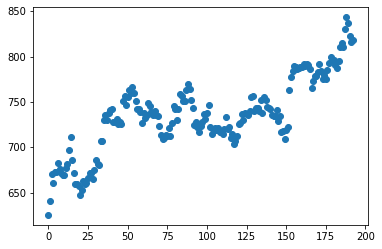

In [52]:
train=data[0:int(len(data)*0.8)]
test=data[int(len(data)*0.8):]
x_train=train['Date'].values.reshape(-1,1)
y_train=train['Open'].values.reshape(-1,1)
x_test=test['Date'].values.reshape(-1,1)
y_test=test['Open'].values.reshape(-1,1)
plt.scatter(x_train,y_train)


In [0]:
x_train_scaled=scaler.fit_transform(x_train)
xtrain=pd.DataFrame(x_train_scaled)
x_test_scaled=scaler.fit_transform(x_test)
xtest=pd.DataFrame(x_test_scaled)


In [0]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

# fitting the model and predicting
model.fit(xtrain, y_train)
preds = model.predict(xtest)

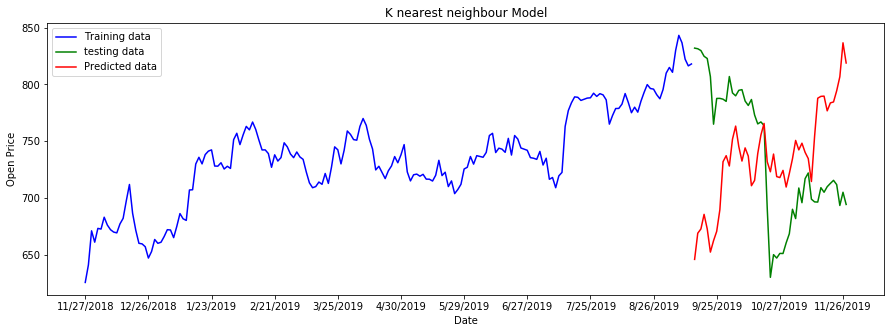

In [55]:
plt.figure(figsize=(15,5))
plt.title("K nearest neighbour Model")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.plot(train.index,y_train,"blue",label='Training data')
plt.plot(test.index,y_test,"green",label='testing data')
plt.plot(test.index,preds,"red",label='Predicted data')
plt.xticks(np.arange(0,242,20),dataset['Date'][0:242:20])
plt.legend()

In [56]:
err=metrics.mean_squared_error(y_test,preds)
errr2=metrics.mean_squared_error(y_train,model.predict(xtrain))
print("Testing error",err)
print("Training error",errr2)


Testing error 7384.2091213151925
Training error 21.652777777777803


In [57]:
xhat=model.predict(xtrain)
dat2=pd.DataFrame({'Actual':y_train.flatten(),'Predicted':xhat.flatten()})#on testing
dat1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':preds.flatten()})#on testing
dat2

,Actual,Predicted
0,625.50,645.816667
1,640.95,645.816667
2,671.00,657.650000
3,661.00,668.383333
4,673.15,668.900000
...,...,...
188,843.30,836.733333
189,836.80,834.133333
190,822.30,825.166667
191,816.40,818.933333
